<a href="https://colab.research.google.com/github/eloiza-dias/python_script_development/blob/main/Time_series_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de séries temporais em dados de casos confirmados de COVID-19 no Brasil

O objetivo desse código é gerar séries temporais (ST) em um banco de dados compilado pelo grupo DataLab, contendo informações de casos de Covid 19 registrados no período de 2020.

#Importação de bibliotecas

In [30]:
import pandas as pd #organização dos dados
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose #decomposição da série
import matplotlib.pyplot as plt #plotar gráficos

#Importando o arquivo com os dados:

In [2]:
#importando a df
df = pd.read_csv('/content/drive/MyDrive/sarah_teste/DF_pronta.csv')
df = round(df,3) #organizando os valores em 2 casas
df.head() #Chamando apenas os 5 primeiros dados

,date,Confirmed,Deaths,Confirmed/100k
0,2020-02-25,2,0,0.010
1,2020-02-26,2,0,0.010
2,2020-02-27,2,0,0.010
3,2020-02-28,4,0,0.021
4,2020-02-29,4,0,0.021


In [3]:
df.tail() #ultimos 5 dados

,date,Confirmed,Deaths,Confirmed/100k
117,2020-06-21,2176432,101418,1708976.856
118,2020-06-22,2228790,102870,1756538.690
119,2020-06-23,2304503,105638,1826181.949
120,2020-06-24,2382550,107735,1893208.144
121,2020-06-25,2451986,109837,1947086.160


In [4]:
#vendo algumas informações em relação ao df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            122 non-null    object 
 1   Confirmed       122 non-null    int64  
 2   Deaths          122 non-null    int64  
 3   Confirmed/100k  122 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.9+ KB


In [5]:
#ajustando as datas e reorganizando a coluna data
df['date'] = pd.to_datetime(df['date'])

Para gerar uma ST, é necessário colocar a coluna com as datas como nosso index:

In [6]:
#alterando a coluna data para index
df.set_index('date', drop = True, inplace = True)
df

,Confirmed,Deaths,Confirmed/100k
date,,,
2020-02-25,2,0,0.010
2020-02-26,2,0,0.010
2020-02-27,2,0,0.010
2020-02-28,4,0,0.021
2020-02-29,4,0,0.021
...,...,...,...
2020-06-21,2176432,101418,1708976.856
2020-06-22,2228790,102870,1756538.690
2020-06-23,2304503,105638,1826181.949


Para gerar a série, tem algumas colunas que não são necessária, então, nesse momento, foram excluídas e mantidas apenas o que vai ser passado para a ST.

In [7]:
df = df.drop("Deaths", axis = 1)

In [8]:
df

,Confirmed,Confirmed/100k
date,,
2020-02-25,2,0.010
2020-02-26,2,0.010
2020-02-27,2,0.010
2020-02-28,4,0.021
2020-02-29,4,0.021
...,...,...
2020-06-21,2176432,1708976.856
2020-06-22,2228790,1756538.690
2020-06-23,2304503,1826181.949


In [9]:
df = df.drop("Confirmed", axis = 1)

In [10]:
df

,Confirmed/100k
date,
2020-02-25,0.010
2020-02-26,0.010
2020-02-27,0.010
2020-02-28,0.021
2020-02-29,0.021
...,...
2020-06-21,1708976.856
2020-06-22,1756538.690
2020-06-23,1826181.949


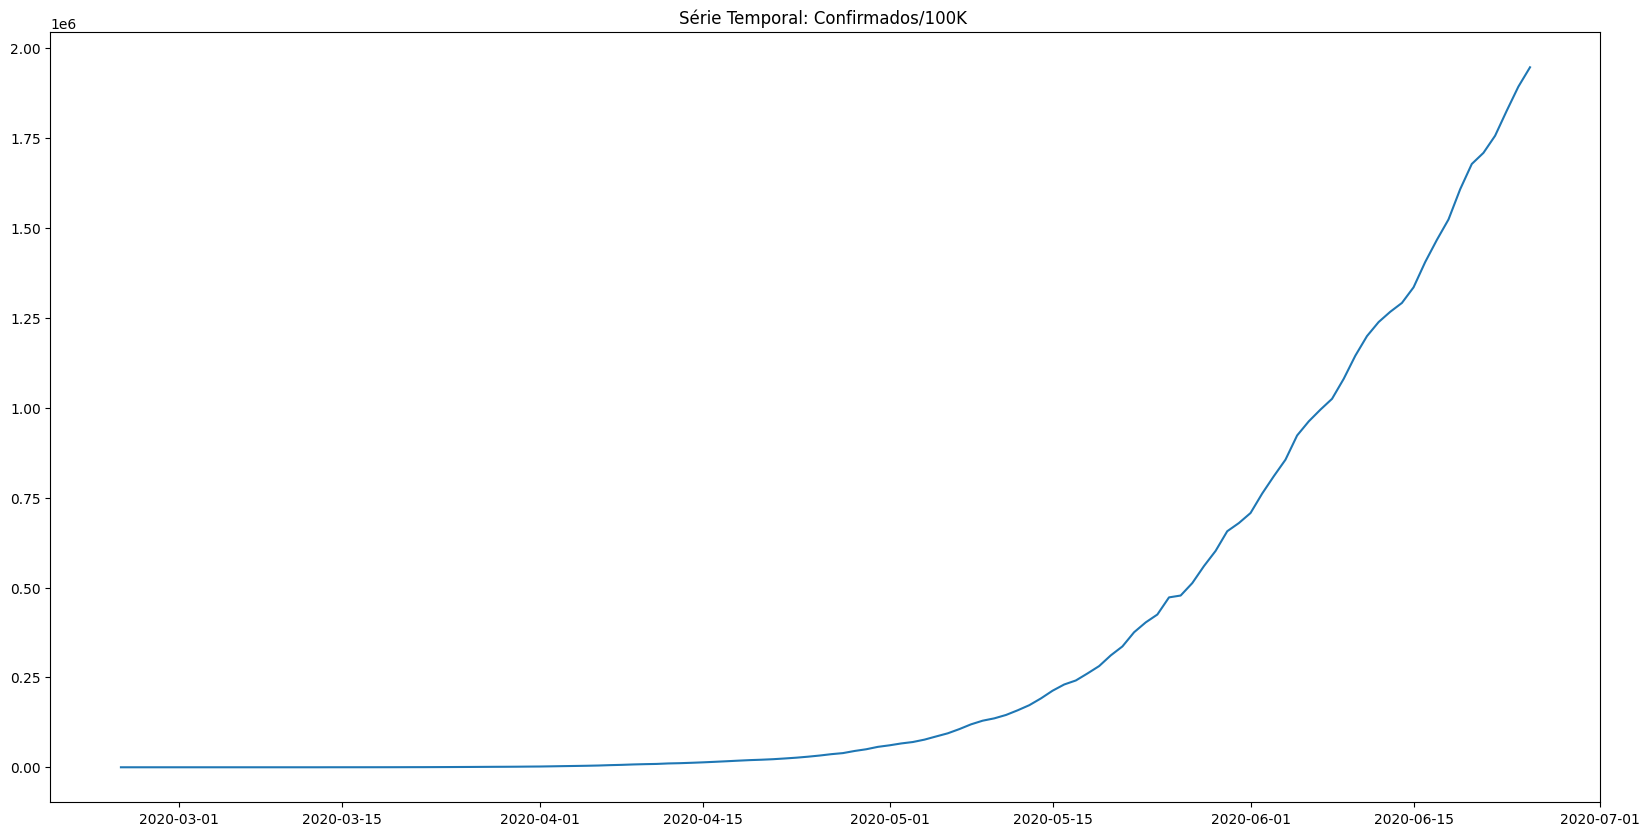

In [11]:
plt.figure(figsize=(20, 10))
plt.title('Série Temporal: Confirmados/100K ')
plt.plot(df)

Como não há muitos dados, eles foram organizados por dia para visualização das ST

In [12]:
tempo_dias = df.resample('D').sum() #somando os valores que foram organizados em dias
tempo_dias.head()

,Confirmed/100k
date,
2020-02-25,0.010
2020-02-26,0.010
2020-02-27,0.010
2020-02-28,0.021
2020-02-29,0.021


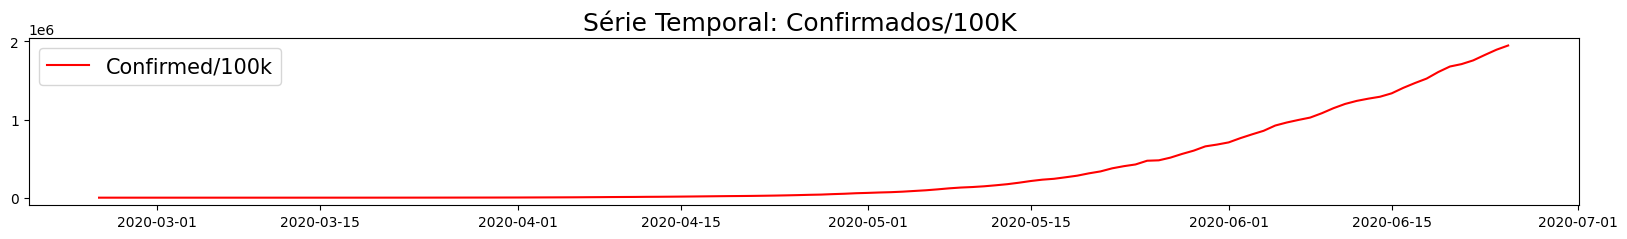

In [13]:
tempo_dias = df.resample('D').sum().dropna()  #pegando minha série e pela função .resample() somando todos os meses entre os anos e .dropna()tirando valores NA
decom = seasonal_decompose(tempo_dias)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

plt.figure(figsize=(20, 10))

plt.subplot(4, 1, 1)
plt.plot(tempo_dias, label = 'Confirmed/100k', color='red')
plt.rcParams.update({'font.size': 15}) #tamanho da fonte

plt.title('Série Temporal: Confirmados/100K ')
plt.legend(loc = 'best')

#Decompondo uma ST

**Tendência**: refere-se à trajetória geral na qual algo está se desenvolvendo ao longo do tempo.

**Sazonalidade**: Variações sazonais referem-se a flutuações que podem ocorrer de forma regular ou repetitiva dentro de um período de tempo específico.

**Residual**: A separação da oscilação (disposta horizontalmente) da tendência foi realizada; aquilo que não foi identificado ou isolado da observação original é considerado ruído, sendo referido como residual neste contexto.

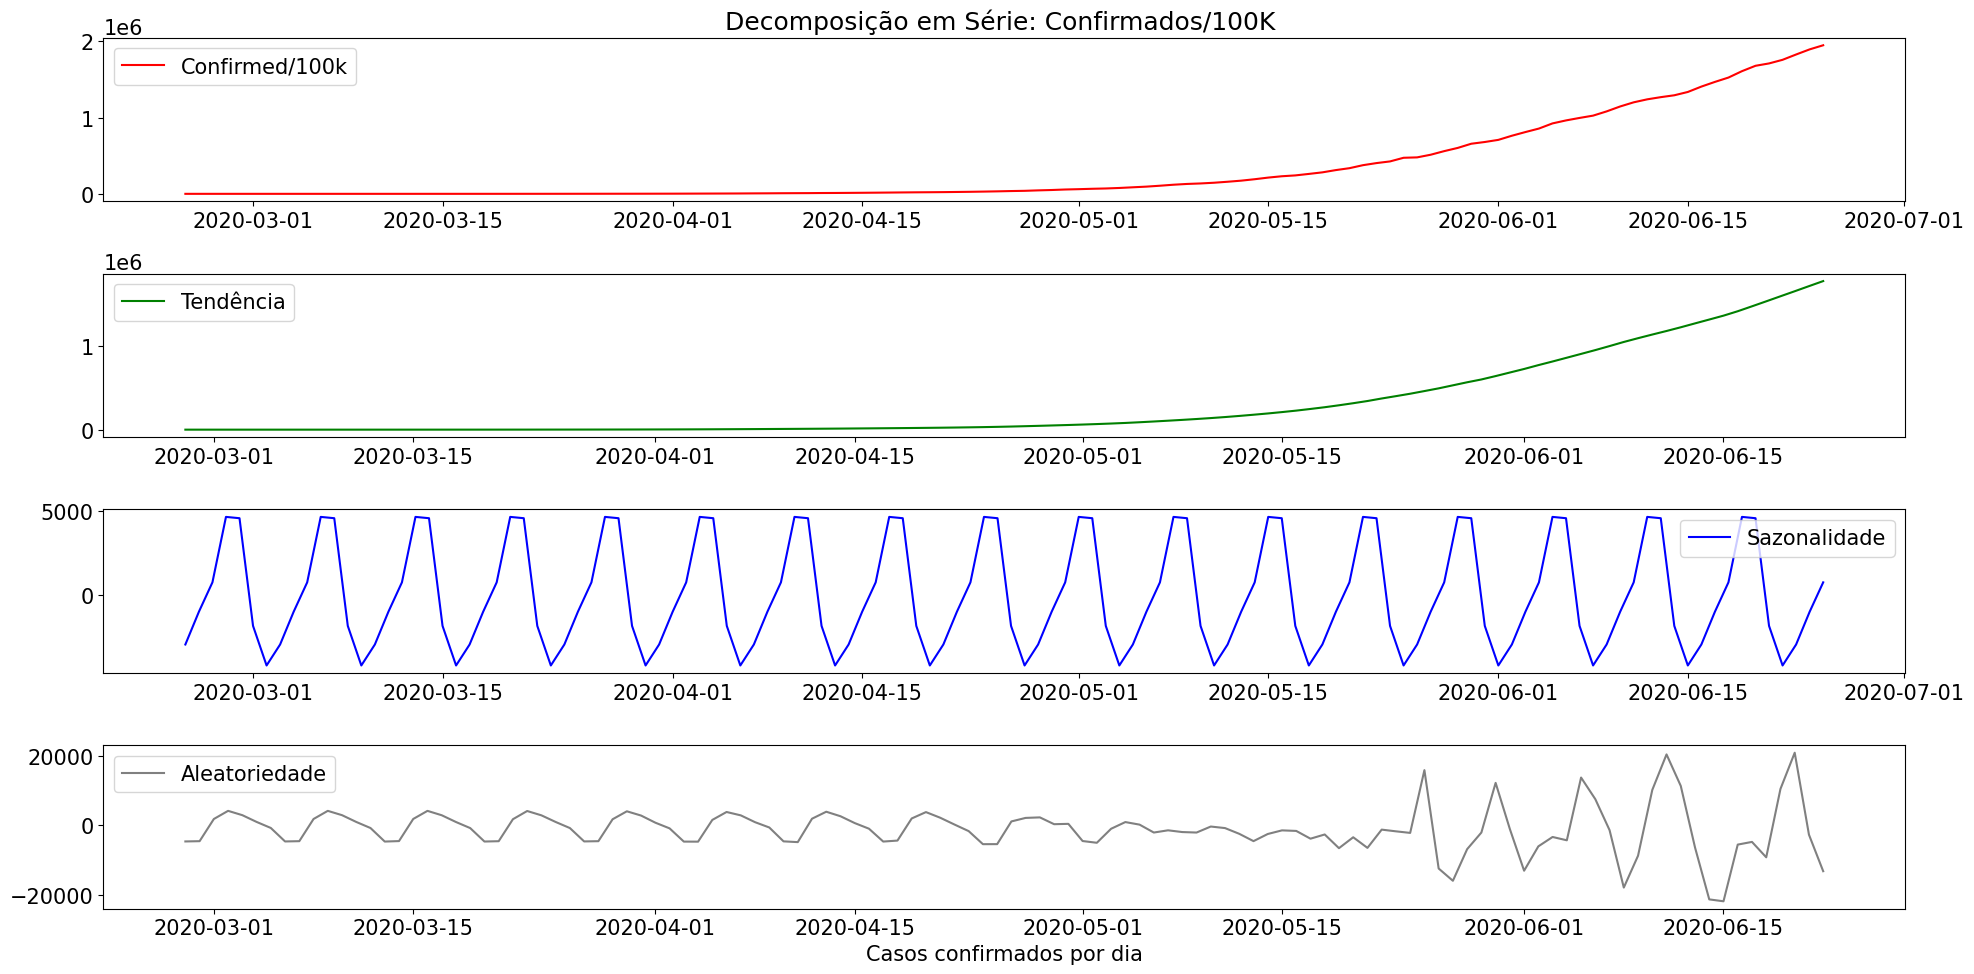

In [14]:
tempo_dias = df.resample('D').sum().dropna()  #pegando minha série e pela função .resample() somando todos os meses entre os anos e .dropna()tirando valores NA
decom = seasonal_decompose(tempo_dias)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

plt.figure(figsize=(20, 10))

plt.subplot(4, 1, 1)
plt.plot(tempo_dias, label = 'Confirmed/100k', color='red')
plt.rcParams.update({'font.size': 15}) #tamanho da fonte

plt.title('Decomposição em Série: Confirmados/100K ')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Casos confirmados por dia')
plt.tight_layout()

#Técnicas de Forecasting usando ARIMA

As metodologias de forecasting (previsões) desempenham um papel crucial, pois ao analisar o histórico, podemos antecipar o futuro. Quanto mais informações acumulamos do passado, maior será a precisão das nossas previsões.

#Séries estacionárias


De forma simplificada, ser estacionária implica que a média, variância e covariância permaneçam constantes ao longo da dimensão temporal, conforme sugerido pelo próprio termo "estacionária".

#Como reconhecer uma Série Estacionária

Existem várias abordagens para realizar essa verificação, tais como:

1. Observação dos gráficos — Em muitos casos, durante a análise exploratória, é possível identificar visualmente se a série temporal é estacionária ou não.

2. Resumo estatístico — É possível gerar um resumo contendo as principais informações estatísticas da série temporal e analisar se há algum indício de estacionariedade.

3. Testes estatísticos — Esses testes possuem a capacidade de indicar se uma série temporal é estacionária ou não, sempre utilizando métodos científicos como base.

#ADF test

O Teste ADF (Dickey-Fuller Aumentado) tem a capacidade de indicar se uma série temporal é estacionária ou não. A **Hipótese Nula (H0)** do teste postula que a série temporal não é estacionária, indicando alguma forma de dependência em relação ao tempo. Em contraste, a **Hipótese Alternativa (H1)** rejeita a hipótese nula, sugerindo que a série temporal é estacionária.

Sempre partiremos do pressuposto de que a série que estamos analisando não é estacionária, ou seja, adotamos a hipótese nula e, por meio deste teste, procuramos verificar sua validade.

Geralmente, optamos por rejeitar a H0 quando o valor p é menor ou igual a um determinado nível de significância. Normalmente, esse nível é estabelecido em 0.01 (1%), 0.05 (5%) ou mesmo 0.1 (10%).

À medida que o valor p diminui, aumentam as evidências contra a hipótese nula. Por exemplo, ao usar um valor p de 0.05, rejeitamos a H0 com um nível de confiança de 95%.

Caso o valor do teste ultrapasse o limite, não conseguiremos rejeitar a hipótese nula.

In [15]:
from statsmodels.tsa.stattools import adfuller # importar o teste ADF

In [27]:
result = adfuller(df)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result[0]))
print('Valor-p: {:.4f}'.format(result[1]))
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -0.7377
Valor-p: 0.8367
Valores Críticos:
	1%: -3.4896
	5%: -2.8875
	10%: -2.5806


Série não estacionária.

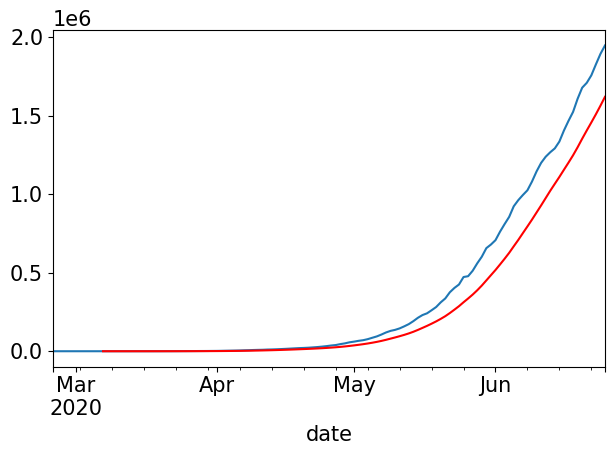

In [28]:
ma = df.rolling(12).mean()

fig, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

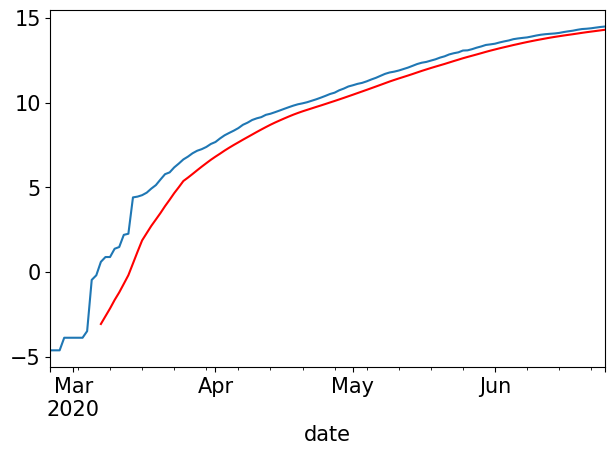

In [31]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

fig, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

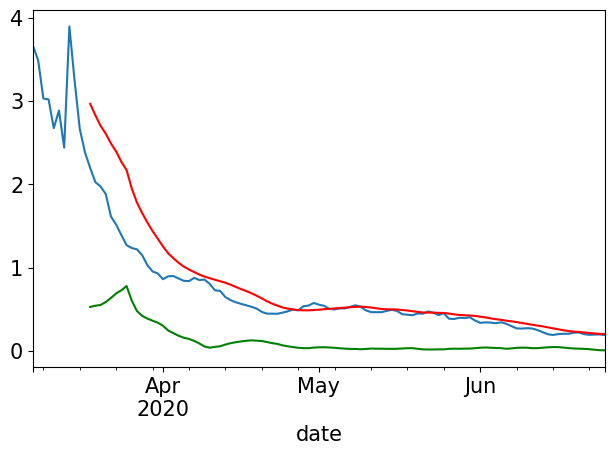

In [32]:
#subtrair média do log dos dados, iremos fazer a média em 12, pois iremos fazer anualmente
df_sub = (df_log - ma_log).dropna()
ma_sub = df_sub.rolling(12).mean()
#desvio padrão
std_sub = df_sub.rolling(12).std()

fig, ax = plt.subplots()
df_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, legend=False, color='r')
std_sub.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

In [33]:
# aplicar ADF e imprimir o resultado
result_sub = adfuller(df_sub)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_sub[0]))
print('Valor-p: {:.10f}'.format(result_sub[1]))
print('Valores Críticos:')
for key, value in result_sub[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -1.9193
Valor-p: 0.3230254179
Valores Críticos:
	1%: -3.4996
	5%: -2.8918
	10%: -2.5829
